In [1]:
import PIL as pil
from matplotlib import pyplot as plt
import numpy as np

In [15]:
def img2array(img):
    nrow = img.size[1]
    ncol = img.size[0]
    img_map = img.load()
    myarray = np.zeros([nrow,ncol,3], dtype=np.uint8)
    for i in range(nrow):
        for j in range(ncol):
            myarray[i,j,0] = img_map[j,i][0]
            myarray[i,j,1] = img_map[j,i][1]
            myarray[i,j,2] = img_map[j,i][2]
    return myarray

def RGB2xyz(img):
    myraw = img2array(img)
    myscale = np.divide(myraw, 255.0)
    myshape = np.shape(myscale)
    myrgb = np.zeros([myshape[0], myshape[1], myshape[2]])
    for i in range(myshape[0]):
        for j in range(myshape[1]):
            if myscale[i,j,0] <= 0.04045:
                myrgb[i,j,0] = myscale[i,j,0]/12.92;
            else:
                myrgb[i,j,0] = np.power((myscale[i,j,0] + 0.055)/1.055,2.4)
                
            if myscale[i,j,1] <= 0.04045:
                myrgb[i,j,1] = myscale[i,j,1]/12.92;
            else:
                myrgb[i,j,1] = np.power((myscale[i,j,1] + 0.055)/1.055,2.4)
                
            if myscale[i,j,2] <= 0.04045:
                myrgb[i,j,2] = myscale[i,j,2]/12.92;
            else:
                myrgb[i,j,2] = np.power((myscale[i,j,2] + 0.055)/1.055,2.4)
                
    m = [[0.4125, 0.2128, 0.0194],
         [0.3578, 0.7157, 0.1193],
         [0.1805, 0.0722, 0.9503]]
    myXYZ = np.zeros([myshape[0], myshape[1], myshape[2]])
    for i in range(myshape[0]):
        for j in range(myshape[1]):
            myXYZ[i,j] = np.matmul(myrgb[i,j], m)
    myxyz = np.zeros([myshape[0], myshape[1], myshape[2]])
    for i in range(myshape[0]):
        for j in range(myshape[1]):
            mysum = myXYZ[i,j,0] + myXYZ[i,j,1] + myXYZ[i,j,2]
            myxyz[i,j,0] = myXYZ[i,j,0]/mysum
            myxyz[i,j,1] = myXYZ[i,j,1]/mysum
            myxyz[i,j,2] = myXYZ[i,j,2]/mysum
    return myxyz

x = np.linspace(0, 1, 100)
y = 0.8 - x
y1 = np.ones([100])*0.35

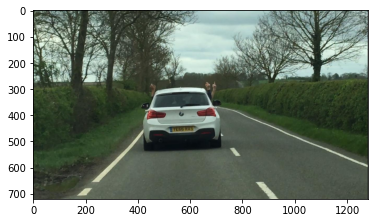

In [16]:
img_car1 = pil.Image.open("../Image/car_no_light_1280x720.jpg")
myraw = img2array(img_car1)
myimg = pil.Image.fromarray(myraw)
myimg_map = myimg.load()
plt.imshow(myimg)

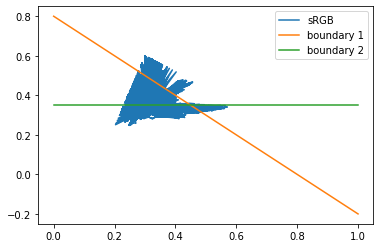

In [17]:
myxyz = RGB2xyz(img_car1)
myshape = myxyz.shape
myx = np.zeros([myshape[0]*myshape[1]])
myy = np.zeros([myshape[0]*myshape[1]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myx[i*myshape[1] + j] = myxyz[i,j,0]
        myy[i*myshape[1] + j] = myxyz[i,j,1]
        
fig, ax = plt.subplots(1,1)
ax.plot(myx, myy)
ax.plot(x, y)
ax.plot(x, y1)
ax.legend(['sRGB','boundary 1', 'boundary 2'])

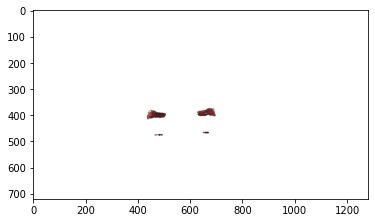

In [18]:
for i in range(myimg.size[0]):
    for j in range(myimg.size[1]):
        if myy[j*myshape[1] + i] >= 0.35 or myy[j*myshape[1] + i] + myx[j*myshape[1] + i] <= 0.7:
            myimg_map[i,j] = (255,255,255)
plt.imshow(myimg)

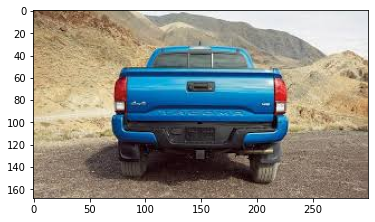

In [20]:
img_car1 = pil.Image.open("../Image/blue_car_01.jpg")
myraw = img2array(img_car1)
myimg = pil.Image.fromarray(myraw)
myimg_map = myimg.load()
plt.imshow(myimg)

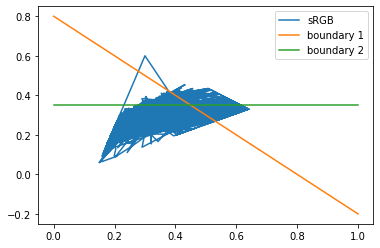

In [21]:
myxyz = RGB2xyz(img_car1)
myshape = myxyz.shape
myx = np.zeros([myshape[0]*myshape[1]])
myy = np.zeros([myshape[0]*myshape[1]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myx[i*myshape[1] + j] = myxyz[i,j,0]
        myy[i*myshape[1] + j] = myxyz[i,j,1]
        
fig, ax = plt.subplots(1,1)
ax.plot(myx, myy)
ax.plot(x, y)
ax.plot(x, y1)
ax.legend(['sRGB','boundary 1', 'boundary 2'])

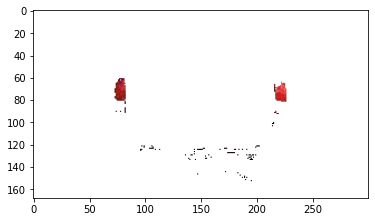

In [22]:
for i in range(myimg.size[0]):
    for j in range(myimg.size[1]):
        if myy[j*myshape[1] + i] >= 0.35 or myy[j*myshape[1] + i] + myx[j*myshape[1] + i] <= 0.8:
            myimg_map[i,j] = (255,255,255)
plt.imshow(myimg)

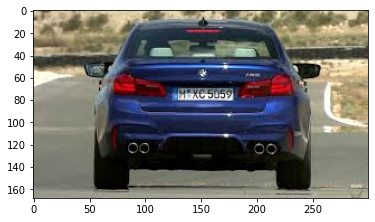

In [23]:
img_car1 = pil.Image.open("../Image/blue_car_02.jpg")
myraw = img2array(img_car1)
myimg = pil.Image.fromarray(myraw)
myimg_map = myimg.load()
plt.imshow(myimg)

/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_95097/1778567755.py:46: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,0] = myXYZ[i,j,0]/mysum
/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_95097/1778567755.py:47: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,1] = myXYZ[i,j,1]/mysum
/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_95097/1778567755.py:48: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,2] = myXYZ[i,j,2]/mysum


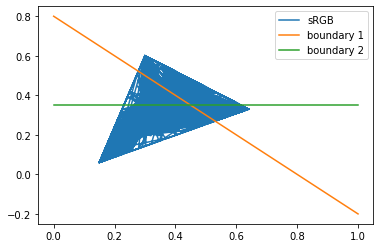

In [24]:
myxyz = RGB2xyz(img_car1)
myshape = myxyz.shape
myx = np.zeros([myshape[0]*myshape[1]])
myy = np.zeros([myshape[0]*myshape[1]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myx[i*myshape[1] + j] = myxyz[i,j,0]
        myy[i*myshape[1] + j] = myxyz[i,j,1]
        
fig, ax = plt.subplots(1,1)
ax.plot(myx, myy)
ax.plot(x, y)
ax.plot(x, y1)
ax.legend(['sRGB','boundary 1', 'boundary 2'])

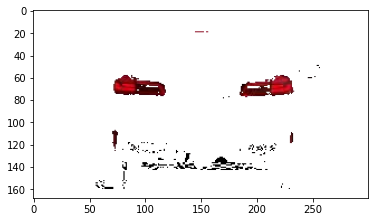

In [27]:
for i in range(myimg.size[0]):
    for j in range(myimg.size[1]):
        if myy[j*myshape[1] + i] >= 0.35 or myy[j*myshape[1] + i] + myx[j*myshape[1] + i] <= 0.8:
            myimg_map[i,j] = (255,255,255)
plt.imshow(myimg)

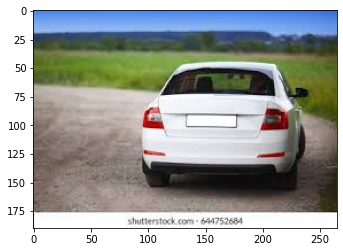

In [28]:
img_car1 = pil.Image.open("../Image/white_car_01.jpg")
myraw = img2array(img_car1)
myimg = pil.Image.fromarray(myraw)
myimg_map = myimg.load()
plt.imshow(myimg)

/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_95097/1778567755.py:46: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,0] = myXYZ[i,j,0]/mysum
/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_95097/1778567755.py:47: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,1] = myXYZ[i,j,1]/mysum
/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_95097/1778567755.py:48: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,2] = myXYZ[i,j,2]/mysum


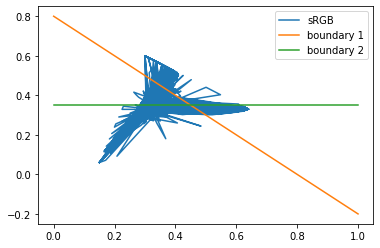

In [29]:
myxyz = RGB2xyz(img_car1)
myshape = myxyz.shape
myx = np.zeros([myshape[0]*myshape[1]])
myy = np.zeros([myshape[0]*myshape[1]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myx[i*myshape[1] + j] = myxyz[i,j,0]
        myy[i*myshape[1] + j] = myxyz[i,j,1]
        
fig, ax = plt.subplots(1,1)
ax.plot(myx, myy)
ax.plot(x, y)
ax.plot(x, y1)
ax.legend(['sRGB','boundary 1', 'boundary 2'])

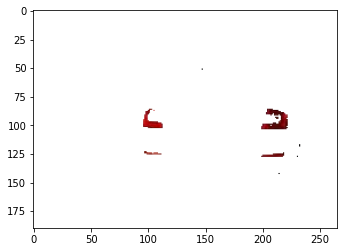

In [30]:
for i in range(myimg.size[0]):
    for j in range(myimg.size[1]):
        if myy[j*myshape[1] + i] >= 0.35 or myy[j*myshape[1] + i] + myx[j*myshape[1] + i] <= 0.8:
            myimg_map[i,j] = (255,255,255)
plt.imshow(myimg)

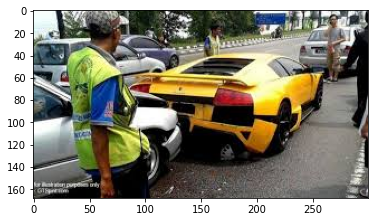

In [35]:
img_car1 = pil.Image.open("../Image/yellow_car_01.jpg")
myraw = img2array(img_car1)
myimg = pil.Image.fromarray(myraw)
myimg_map = myimg.load()
plt.imshow(myimg)

/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_95097/1778567755.py:46: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,0] = myXYZ[i,j,0]/mysum
/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_95097/1778567755.py:47: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,1] = myXYZ[i,j,1]/mysum
/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_95097/1778567755.py:48: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,2] = myXYZ[i,j,2]/mysum


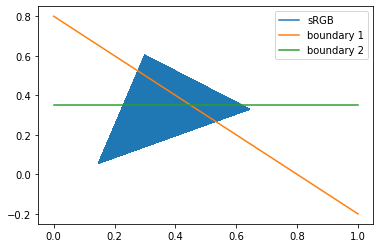

In [36]:
myxyz = RGB2xyz(img_car1)
myshape = myxyz.shape
myx = np.zeros([myshape[0]*myshape[1]])
myy = np.zeros([myshape[0]*myshape[1]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myx[i*myshape[1] + j] = myxyz[i,j,0]
        myy[i*myshape[1] + j] = myxyz[i,j,1]
        
fig, ax = plt.subplots(1,1)
ax.plot(myx, myy)
ax.plot(x, y)
ax.plot(x, y1)
ax.legend(['sRGB','boundary 1', 'boundary 2'])

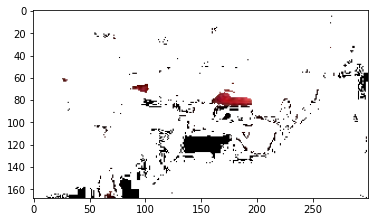

In [37]:
for i in range(myimg.size[0]):
    for j in range(myimg.size[1]):
        if myy[j*myshape[1] + i] >= 0.35 or myy[j*myshape[1] + i] + myx[j*myshape[1] + i] <= 0.8:
            myimg_map[i,j] = (255,255,255)
plt.imshow(myimg)